In [2]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
import graphviz

# HPO 를 위한 설정
from sklearn.model_selection import train_test_split, GridSearchCV

# XAI를 위한 설정
from sklearn.inspection import PartialDependenceDisplay

In [3]:
# 데이터를 불러오기
wine = load_wine()

In [4]:
# 데이터 프레임 생성
df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
df['target'] = wine.target

In [5]:
# 모형 학습
# 특성 (Feature)와 타겟(target) 의 데이터를 분리
X = df.drop('target', axis = 1)
y = df['target']

In [6]:
# 학습데이터와 테스트 데이터로 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
# HyperParameter 를 '수기' 변경
clf_mannual = DecisionTreeClassifier(
                             criterion = 'entropy', 
                             max_depth=3,
                             min_samples_split=3,
                             min_samples_leaf=1,
                             splitter='random',
                             random_state=4)

clf_mannual.fit(X_train, y_train)

y_pred_mannual = clf_mannual.predict(X_test)
accuracy_mannual = accuracy_score(y_test, y_pred_mannual)
print("accuracy_mannual:", accuracy_mannual)

accuracy_mannual: 0.8611111111111112


In [8]:
# HyperParameter Tunning
# GridSearch를 HyperParameter 를 범위를 한정

param_grid = {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : [2,3,4,5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [9]:
#HPO 및 Fitting
clf_grid = DecisionTreeClassifier(random_state= 42)
# core
grid_search = GridSearchCV(clf_grid, param_grid, cv=5) # 교차 검증 5회
# HyperParameter 를 찾고, 이걸 가지고 fitting 이 모두 수행
grid_search.fit(X_train, y_train)

print("Best Hyper-parameter", grid_search.best_params_)
print("Best Score", grid_search.best_score_)

Best Hyper-parameter {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score 0.9224137931034484


In [10]:
# HPO 로 만들어진 모형의 정확도 계산
best_model = grid_search.best_estimator_

y_pred_grid = best_model.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print('Accuracy Grid:', accuracy_grid)

Accuracy Grid: 0.9444444444444444


In [12]:
# Feature Importance 를 계산
importances = best_model.feature_importances_
importances

array([0.        , 0.        , 0.02134756, 0.        , 0.        ,
       0.        , 0.41901243, 0.        , 0.        , 0.39238767,
       0.        , 0.        , 0.16725234])

([<matplotlib.axis.XTick at 0x115259090>,
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'malic_acid'),
  Text(2, 0, 'ash'),
  Text(3, 0, 'alcalinity_of_ash'),
  Text(4, 0, 'magnesium'),
  Text(5, 0, 'total_phenols'),
  Text(6, 0, 'flavanoids'),
  Text(7, 0, 'nonflavanoid_phenols'),
  Text(8, 0, 'proanthocyanins'),
  Text(9, 0, 'color_intensity'),
  Text(10, 0, 'hue'),
  Text(11, 0, 'od280/od315_of_diluted_wines'),
  Text(12, 0, 'proline')])

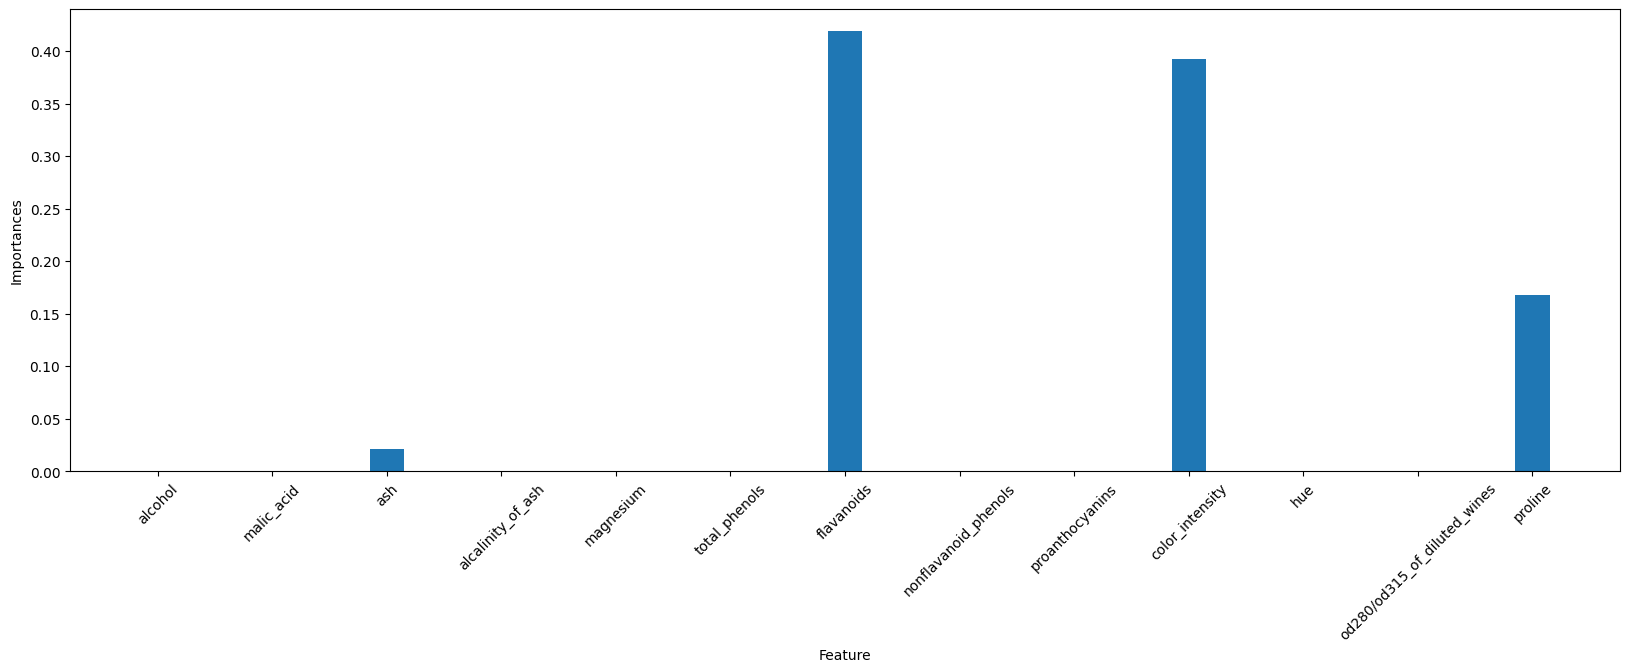

In [14]:
# Best model 의 Feature Importance 를 시각화

plt.figure(figsize = (20,6))

# 막대 그래프 생성
plt.bar(range(len(importances)), importances, width=0.3)
plt.xlabel('Feature')
plt.ylabel('Importances')
plt.xticks(range(len(importances)), X.columns, rotation=45)

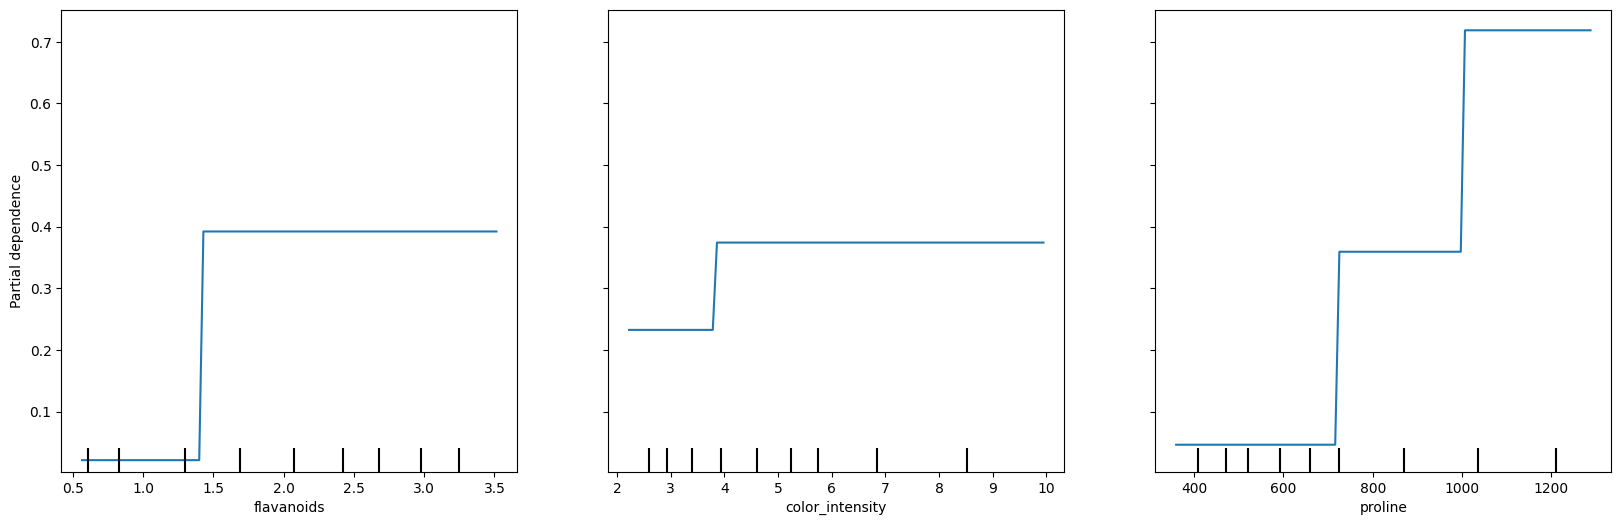

In [18]:
# Partial Dependance Plot (PDP)
# 시각화할 특성을 선택
feature = ['flavanoids', 'color_intensity', 'proline']
fig, ax = plt.subplots(figsize = (20,6))
display = PartialDependenceDisplay.from_estimator(best_model, X_train, feature, target=0, ax=ax)

